In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df.csv")

In [3]:
df.head(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [5]:
df["Job Title"].value_counts()

Job Title
Data Scientist                              703
Data Analyst                                362
Data Engineer                               317
Senior Data Scientist                       141
Machine Learning Engineer                    72
                                           ... 
Scientist Medical Laboratory II               1
IT Data Science Analyst                       1
Research Scientist Associate IV               1
Laboratory Scientist II                       1
Supply Chain Consultant - Data Scientist      1
Name: count, Length: 2959, dtype: int64

In [6]:
df["Rating"].value_counts()

Rating
-1.0    710
 3.9    451
 3.8    442
 4.0    415
 4.1    405
 3.7    395
 3.6    347
 3.5    290
 4.2    286
 3.4    240
 4.3    215
 3.3    194
 5.0    194
 3.2    166
 3.1    146
 4.5    143
 4.4    126
 4.6    110
 4.7     84
 4.8     77
 3.0     73
 2.9     70
 2.8     67
 4.9     61
 2.5     35
 2.6     34
 2.7     33
 2.4     20
 2.3     13
 2.2     11
 1.0     10
 1.6      9
 2.1      7
 2.0      4
 1.9      4
 1.5      2
 1.7      2
 1.8      1
Name: count, dtype: int64

In [7]:
df["Location"].value_counts()

Location
Austin, TX         345
Chicago, IL        333
San Diego, CA      331
New York, NY       303
Los Angeles, CA    234
                  ... 
Redlands, CA         1
Pittsburg, CA        1
Elk Grove, CA        1
Coronado, CA         1
Wisconsin, WI        1
Name: count, Length: 545, dtype: int64

*Remove instances without salary estimates*

In [8]:
df = df[df["Salary Estimate"] != "-1"]

*Remove K and $*

In [9]:
df["Salary Estimate"] = df["Salary Estimate"].apply(lambda x: x.replace("K", "").replace("$", ""))

*Add hourly binary columns*

In [10]:
df["Hourly"] = df["Salary Estimate"].apply(lambda x: 1 if "per hour" in x.lower() else 0)

*Add employer provided binary columns*

In [11]:
df["Emloyer_Provided"] = df["Salary Estimate"].apply(lambda x: 1 if "employer est" in x.lower() else 0)

*Add min salary columns and cast them into integer type*

In [12]:
df["Min_Salary"] = df["Salary Estimate"].apply(lambda x: int(x.split("-")[0]))

*Add max salary columns and cast them into integer type*

In [13]:
df["Max_Salary"] = df["Salary Estimate"].apply(lambda x: x.split("-")[1]).replace("[^0-9]", "", regex= True)
df["Max_Salary"] = df["Max_Salary"].apply(int)

*Convert hourly wages to annual*

In [14]:
df["Min_Salary"] = df.apply(lambda x: x.Min_Salary if x.Hourly == 0 else x.Min_Salary * 2.05, axis= 1)
df["Max_Salary"] = df.apply(lambda x: x.Max_Salary if x.Hourly == 0 else x.Max_Salary * 2.05, axis= 1)

In [15]:
df["Average_Salary"] = (df.Min_Salary + df.Max_Salary) / 2

*Remove the initial salary estimate column*

In [16]:
df.drop("Salary Estimate", axis= 1, inplace= True)

*Ensure ratings are float type*

In [17]:
df["Rating"] = df["Rating"].apply(lambda x: float(x))

*Remove rating from the end of company names*

In [18]:
df["Company Name"] = df["Company Name"].apply(lambda x: x.split("\n")[0])

*State: what state is the job in*

In [19]:
df["State"] = df["Location"].apply(lambda x: x.split()[-1]) 

In [20]:
df = df[df.State != "Kingdom"] 
df = df[df.State != "States"]

*Replace non-numeric cells in Founded column with -1*

In [21]:
df["Founded"].replace("[^0-9]", -1, regex= True, inplace= True)

In [22]:
df["Company_age"] = df["Founded"].apply(lambda x: 2021-int(x) if int(x) > 0 else -1)

*Organize job titles*

In [23]:
def title_organizer(x):
    
    x = x.lower()
    
    if ("data scientist" in x) or ("data science" in x):
        return "data scientist"
    elif "data engineer" in x:
        return "data engineer"
    elif "deep learning" in x:
        return "deep learning engineer"
    elif "machine learning" in x:
        return "machine learning engineer"
    elif "director" in x:
        return "director"
    elif "manager" in x:
        return "manager"
    elif "analyst" in x:
        return "analyst"
    elif "researcher" in x:
        return "researcher"
    else:
        return "other"

df["Title"] = df["Job Title"].apply(title_organizer)

*Senior position*

In [24]:
def senior_junior(x):
    x = x.lower()
    if "sr" in x or "senior" in x or "sr." in x or "lead" in x or "principal" in x or "vp" in x or "manager" in x:
        return "senior"
    elif "jr" in x or "junior" in x or "jr." in x:
        return "junior"
    else:
        return "other"

df["Seniority"] = df["Job Title"].apply(senior_junior)

*Size*

In [25]:
df["Size"].replace("Unknown", "-1", regex= True, inplace= True)
df["Size"] = df["Size"].str.lower()

*Type of ownership*

In [26]:
df["Type of ownership"].replace("Unknown", "-1", regex= True, inplace= True)

*Drop unwanted columns, reorder the remining columns, and write the dataframe to csv format*

In [27]:
df.drop(["Company Name", "Location", "Founded", "Job Title", "Revenue", "Min_Salary", "Max_Salary"], 
         inplace= True,
         axis= 1)

In [28]:
df = df.reindex(columns= ["Average_Salary", "Title","Seniority", "Rating", "Hourly", "Emloyer_Provided",
                          "Company_age", "Industry", "Sector", "Type of ownership", "Size", "State"]
               )

In [29]:
df

,Average_Salary,Title,Seniority,Rating,Hourly,Emloyer_Provided,Company_age,Industry,Sector,Type of ownership,Size,State
0,146.000,data scientist,senior,3.5,0,0,14,Travel Agencies,Travel & Tourism,Company - Private,501 to 1000 employees,NY
1,146.000,data scientist,other,4.5,0,0,13,"Health, Beauty, & Fitness",Consumer Services,Company - Private,1001 to 5000 employees,NY
2,146.000,data scientist,senior,-1.0,0,0,-1,-1,-1,-1,1 to 50 employees,NY
3,146.000,analyst,other,3.4,0,0,2,Internet,Information Technology,Company - Private,201 to 500 employees,NJ
4,146.000,data scientist,other,3.4,0,0,14,Advertising & Marketing,Business Services,Company - Private,51 to 200 employees,NY
...,...,...,...,...,...,...,...,...,...,...,...,...
5882,68.000,other,other,4.2,0,0,75,Federal Agencies,Government,Government,10000+ employees,OH
5883,89.500,other,senior,4.0,0,0,13,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Public,501 to 1000 employees,OH
5886,89.000,analyst,senior,4.0,0,0,13,Computer Hardware & Software,Information Technology,Company - Public,1001 to 5000 employees,OH
5887,59.000,analyst,other,3.6,0,0,39,Electrical & Electronic Manufacturing,Manufacturing,Company - Private,201 to 500 employees,OH


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5522 entries, 0 to 5891
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average_Salary     5522 non-null   float64
 1   Title              5522 non-null   object 
 2   Seniority          5522 non-null   object 
 3   Rating             5522 non-null   float64
 4   Hourly             5522 non-null   int64  
 5   Emloyer_Provided   5522 non-null   int64  
 6   Company_age        5522 non-null   int64  
 7   Industry           5522 non-null   object 
 8   Sector             5522 non-null   object 
 9   Type of ownership  5522 non-null   object 
 10  Size               5522 non-null   object 
 11  State              5522 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 560.8+ KB


In [31]:
df.describe()

,Average_Salary,Rating,Hourly,Emloyer_Provided,Company_age
count,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000
mean,105.474638,3.284951,0.004708,0.011409,39.924846
std,35.589310,1.603858,0.068463,0.106211,52.063773
min,30.750000,-1.000000,0.000000,0.000000,-1.000000
25%,76.500000,3.300000,0.000000,0.000000,5.000000
50%,101.500000,3.800000,0.000000,0.000000,21.000000
75%,129.500000,4.100000,0.000000,0.000000,52.000000
max,268.000000,5.000000,1.000000,1.000000,396.000000


<Axes: ylabel='Frequency'>

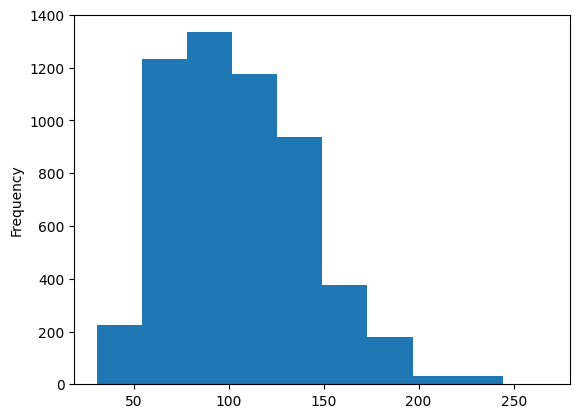

In [32]:
df["Average_Salary"].plot.hist()

<Axes: ylabel='Frequency'>

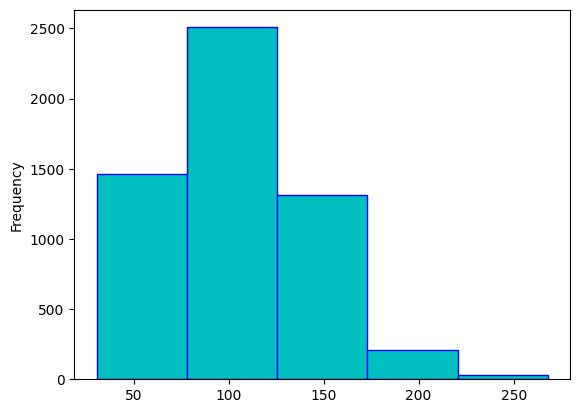

In [33]:
df["Average_Salary"].plot.hist(bins= 5, color= "c", edgecolor= "b")

In [34]:
state = df["State"].value_counts()
print(state)

State
CA    1320
TX    1257
OH     409
IL     368
PA     324
NY     313
AZ     297
FL     261
MA     239
NJ     233
MI     203
VA     131
DC      85
MD      61
DE      10
WI       4
GA       1
ME       1
KY       1
NM       1
NH       1
IN       1
NC       1
Name: count, dtype: int64


<Axes: xlabel='State'>

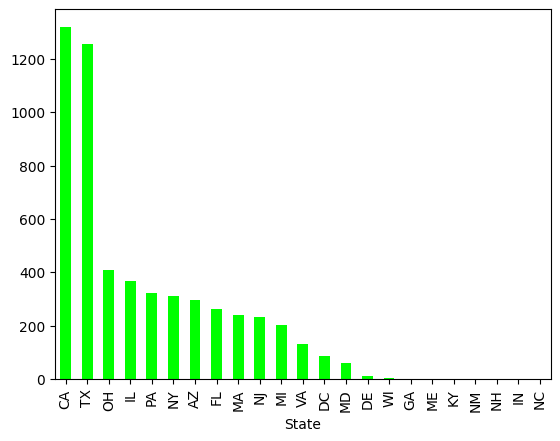

In [35]:
state.plot(kind= "bar", color = "lime")